# Labeling Party Results

- We verified some of the detected species with manual labeling (performed by non-experts)

In [1]:
from pathlib import Path

base_dir = Path("/Volumes/passive-acoustic-biodiversity/kendall-frost-march-2025/selected_species_audio_clips")

with_json = []
without_json = []

# Go through each species subfolder
for species_dir in base_dir.iterdir():
    if species_dir.is_dir():
        json_files = list(species_dir.glob("*.json"))
        if json_files:
            with_json.append(species_dir.name)
        else:
            without_json.append(species_dir.name)

print(f"Total species folders: {len(with_json) + len(without_json)}")
print(f"Folders with JSON files: {len(with_json)}")
print(f"Folders without JSON files: {len(without_json)}")

print("\nSpecies folders WITH JSONs:")
print(with_json)
print("\nSpecies folders WITHOUT JSONs:")
print(without_json)


Total species folders: 109
Folders with JSON files: 56
Folders without JSON files: 53

Species folders WITH JSONs:
['Great_Horned_Owl', 'Rock_Pigeon', 'Sanderling', "Anna's_Hummingbird", 'Red-breasted_Nuthatch', 'Barn_Owl', 'Savannah_Sparrow', 'Ring-billed_Gull', 'Red_Knot', 'Black-bellied_Plover', 'Royal_Tern', 'Whimbrel', 'Green-winged_Teal', 'American_Wigeon', 'American_Goldfinch', 'American_Kestrel', 'American_Crow', 'American_Pipit', 'Greater_Yellowlegs', "Say's_Phoebe", 'Black_Skimmer', 'White-breasted_Nuthatch', 'Willet', 'Ash-throated_Flycatcher', 'Ring-necked_Duck', 'Short-billed_Dowitcher', 'American_Avocet', 'Pygmy_Nuthatch', 'Red-shouldered_Hawk', 'Rock_Wren', 'California_Gull', 'Black-necked_Stilt', 'Redhead', "Allen's_Hummingbird", 'Loggerhead_Shrike', 'Sora', 'Red-throated_Loon', 'Semipalmated_Plover', 'Surfbird', "Wilson's_Snipe", 'American_Coot', 'Song_Sparrow', 'Wrentit', 'Verdin', 'Great_Egret', 'California_Quail', "Bell's_Sparrow", 'Hooded_Oriole', 'Western_Meadowla

In [4]:
import json
from pathlib import Path

all_false = []
all_true = []
mixed = []
no_json = []

for species_dir in base_dir.iterdir():
    if species_dir.is_dir():
        json_files = list(species_dir.glob("*.json"))
        
        if not json_files:
            no_json.append(species_dir.name)
            continue

        # Combine all `isFlagged` values from all JSONs in the folder
        all_flags = []

        for json_file in json_files:
            try:
                with open(json_file, "r") as f:
                    data = json.load(f)
                    for entry in data.get("table", []):
                        all_flags.append(entry.get("isFlagged"))
            except Exception as e:
                print(f"⚠️ Error reading {json_file}: {e}")
                continue

        if all(flag is False for flag in all_flags):
            all_false.append(species_dir.name)
        elif all(flag is True for flag in all_flags):
            all_true.append(species_dir.name)
        else:
            mixed.append(species_dir.name)

print(f"Total species detected: {len(all_false) + len(all_true) + len(mixed) + len(no_json)}")
print(f"Number of Species labeled: {len(all_false) + len(all_true) + len(mixed)}")
print(f"Number of Species with at least one yes-verified recording: {len(all_false) + len(mixed)}")
print(f"\nAll isFlagged = False (species found): {len(all_false)}")
print(f"All isFlagged = True (species NOT found): {len(all_true)}")
print(f"Mixed isFlagged values: {len(mixed)}")
print(f"No JSON files found: {len(no_json)}")


print("\nSpecies with all False:")
print(all_false)

print("\nSpecies with all True:")
print(all_true)

print("\nSpecies with Mixed:")
print(mixed)

print("\nSpecies with no JSON:")
print(no_json)


Total species detected: 109
Number of Species labeled: 56
Number of Species with at least one yes-verified recording: 37

All isFlagged = False (species found): 16
All isFlagged = True (species NOT found): 19
Mixed isFlagged values: 21
No JSON files found: 53

Species with all False:
['American_Goldfinch', 'American_Crow', 'Black_Skimmer', 'Ash-throated_Flycatcher', 'American_Avocet', 'Black-necked_Stilt', "Allen's_Hummingbird", 'Loggerhead_Shrike', 'Wrentit', 'Great_Egret', "Bell's_Sparrow", 'Hooded_Oriole', 'Western_Meadowlark', 'Belted_Kingfisher', 'Barn_Swallow', 'Acorn_Woodpecker']

Species with all True:
['Rock_Pigeon', 'Sanderling', 'Red-breasted_Nuthatch', 'Red_Knot', 'American_Kestrel', 'Pygmy_Nuthatch', 'Red-shouldered_Hawk', 'Rock_Wren', 'Redhead', 'Sora', 'Red-throated_Loon', 'Surfbird', "Wilson's_Snipe", 'American_Coot', 'Song_Sparrow', 'Verdin', 'Purple_Finch', 'Black_Phoebe', 'Blue-winged_Teal']

Species with Mixed:
['Great_Horned_Owl', "Anna's_Hummingbird", 'Barn_Owl', 

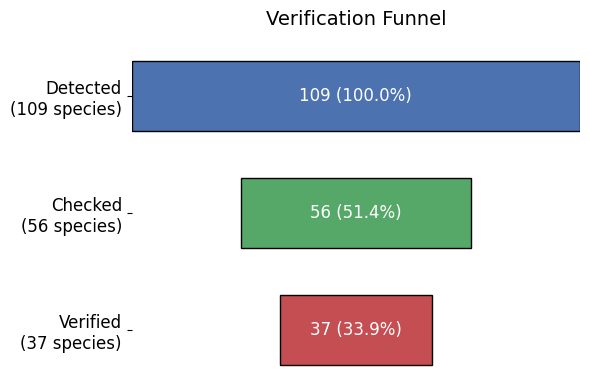

In [5]:
import matplotlib.pyplot as plt

stages = ['Detected\n(109 species)', 
          'Checked\n(56 species)', 
          'Verified\n(37 species)']
values = [109, 56, 37]

percentages = [v / values[0] * 100 for v in values]
max_val = max(values)
colors = ['#4C72B0', '#55A868', '#C44E52']
fig, ax = plt.subplots(figsize=(6, 4))

for i, (val, pct) in enumerate(zip(values, percentages)):
    left = (max_val - val) / 2
    ax.barh(
        y=i,
        width=val,
        height=0.6,
        left=left,
        color=colors[i],
        edgecolor='black'
    )

    ax.text(
        x=max_val / 2,
        y=i,
        s=f"{val} ({pct:.1f}%)",
        ha='center',
        va='center',
        color='white',
        fontsize=12
    )

ax.set_yticks(range(len(stages)))
ax.set_yticklabels(stages, fontsize=12)
ax.invert_yaxis()               
ax.set_xticks([])              
ax.set_xlim(0, max_val)         
ax.set_frame_on(False)         
ax.set_title("Verification Funnel", fontsize=14, pad=15)

plt.tight_layout()
plt.show()
